In [31]:
import pandas as pd

# reading of datafiles
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv.zip')

print("Airlines Data:")
print(airlines.head())

print("\nAirports Data:")
print(airports.head())

print("\nFlights Data:")
print(flights.head())


C:\Users\User\AppData\Local\Temp\ipykernel_31168\1796353439.py:6: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv.zip')


Airlines Data:
  IATA_CODE                 AIRLINE
0        UA   United Air Lines Inc.
1        AA  American Airlines Inc.
2        US         US Airways Inc.
3        F9  Frontier Airlines Inc.
4        B6         JetBlue Airways

Airports Data:
  IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447  

Flights Data:
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS  

### I have uploaded three files: airlines, airports, and flights. The data contains information about airlines, airports, and flights, including delays, routes, and dates.
### Next, I will explore and analyze the data to check data types and missing values.

In [2]:
print("Airlines Data Info:")
print(airlines.info())
print(airlines.isnull().sum())

print("\nAirports Data Info:")
print(airports.info())
print(airports.isnull().sum())

print("\nFlights Data Info:")
print(flights.info())
print(flights.isnull().sum())

Airlines Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes
None
IATA_CODE    0
AIRLINE      0
dtype: int64

Airports Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB
None
IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE   

* **Airlines Data**: This is a small table that links airline codes to their names.  
* **Airports Data**: It contains information about 322 airports, including their names and geographic coordinates, with 3 missing values in Latitude and Longitude.  
* **Flights Data**: This is a very large dataset with details about flights, including delays and routes, but with many missing values in some columns related to delays and cancellations.  

### In the first step, I will handle missing values

**Airlines Data**  
* *Observation*: No missing values.  
* *Action*: No action needed.  

**Airports Data**  
* *Observation*: LATITUDE and LONGITUDE have 3 missing values.  
* *Action*: Fill these missing values with appropriate mean values.  

**Flights Data**  
* *Observation*: Several columns have missing values, such as:  
`TAIL_NUMBER`, `CANCELLATION_REASON`, and delays (`DEPARTURE_DELAY`, `ARRIVAL_DELAY`, etc.).  
* *Action*:  
  1. **TAIL_NUMBER**: Missing values are filled with `'Unknown'`.  
  2. **DEPARTURE_TIME**: Pending further clarification.  
  3. **Delays (`DEPARTURE_DELAY`, `ARRIVAL_DELAY`)**: Missing values here often mean the flight was not delayed. Filled with `0`.  
  4. **CANCELLATION_REASON**: Missing values mean the flight was not canceled. Filled with `"Not Cancelled"`.  

In [3]:
#airport data
airports['LATITUDE'].fillna(airports['LATITUDE'].mean(), inplace=True)
airports['LONGITUDE'].fillna(airports['LONGITUDE'].mean(), inplace=True)
print(airports.isnull().sum())

#flight data
flights['TAIL_NUMBER'].fillna('Unknown', inplace=True)
delay_columns = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 
                 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
flights[delay_columns] = flights[delay_columns].fillna(0)
flights['CANCELLATION_REASON'].fillna('Not Cancelled', inplace=True)
print(flights.isnull().sum())

C:\Users\User\AppData\Local\Temp\ipykernel_31168\1677000491.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airports['LATITUDE'].fillna(airports['LATITUDE'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_31168\1677000491.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_31168\1677000491.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flights['CANCELLATION_REASON'].fillna('Not Cancelled', inplace=True)


YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY             0
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY               0
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON         0
AIR_SYSTEM_DELAY            0
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
dtype: int64


#### I chose not to handle missing values in all columns immediately as my focus is first to understand and analyze the data in its original form. This approach helps me gain better insight into the data's structure and significance before deciding which columns require further processing.

In [4]:
#statistics:
print("Airlines Statistics:")
print(airlines.describe())

print("\nAirports Statistics:")
print(airports.describe())

print("\nFlights Statistics:")
print(flights.describe())

Airlines Statistics:
       IATA_CODE                AIRLINE
count         14                     14
unique        14                     14
top           UA  United Air Lines Inc.
freq           1                      1

Airports Statistics:
         LATITUDE   LONGITUDE
count  322.000000  322.000000
mean    38.981244  -98.378964
std      8.576376   21.422679
min     13.483450 -176.646030
25%     33.666645 -110.492015
50%     39.199280  -93.743140
75%     43.134613  -82.988090
max     71.285450  -64.798560

Flights Statistics:
            YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50% 

### Airlines Statistics
* This dataset contains 14 airlines with unique codes and names. All values are distinct.

### Airports Statistics
* **Average values:** The average latitude is approximately 39°N, and the average longitude is approximately 98°W.  
* **Minimum and Maximum:** The range spans from tropical regions (min: 13°N) to Alaska (max: 71°N).

### Flights Statistics
#### Times and Delays
**SCHEDULED_DEPARTURE and DEPARTURE_TIME:**  
* Flights depart on average around 13:30 (military time).  
* **Minimum:** 1 minute past midnight. **Maximum:** 23:59.  

**DEPARTURE_DELAY:**  
* **Average:** Approximately 9 minutes delay.  
* **Minimum:** -82 minutes (departed early).  
* **Maximum:** 1988 minutes (extreme delay).  

**ARRIVAL_DELAY:**  
* **Average:** Approximately 4 minutes delay.  
* **Minimum:** -87 minutes (arrived early).  
* **Maximum:** 1971 minutes (extreme delay).  

#### CANCELLED and DIVERTED  
* Approximately 1.5% of flights are canceled.  
* Approximately 0.26% of flights are diverted.  

#### Types of Delays  
* **AIR_SYSTEM_DELAY:** Average contribution from air traffic control: 13 minutes.  
* **AIRLINE_DELAY:** Delays caused by the airline average 19 minutes.  
* **WEATHER_DELAY:** Weather-related delays average 3 minutes but can be as high as 1,211 minutes.  

### From here, I choose to focus on visualizing the distribution of key columns, such as:

* Delays (`DEPARTURE_DELAY`, `ARRIVAL_DELAY`).  
* Canceled flights (`CANCELLED`).  
* Distance (`DISTANCE`).  

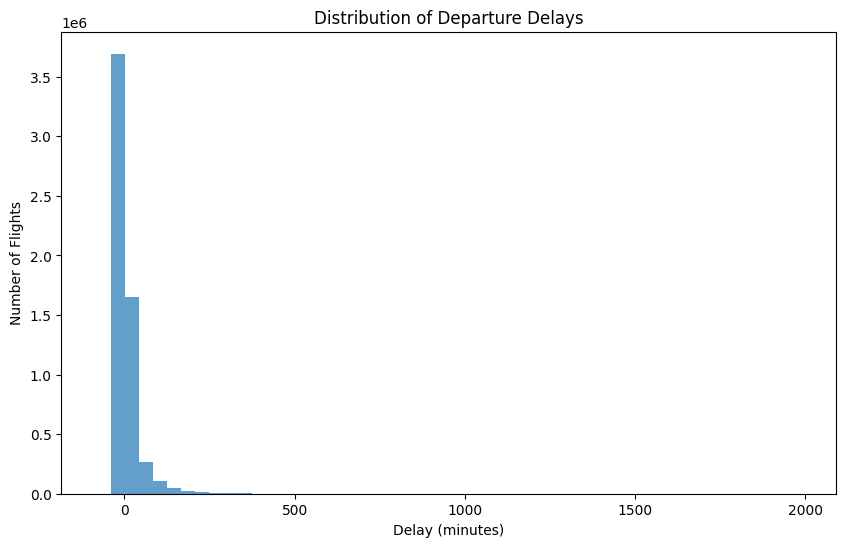

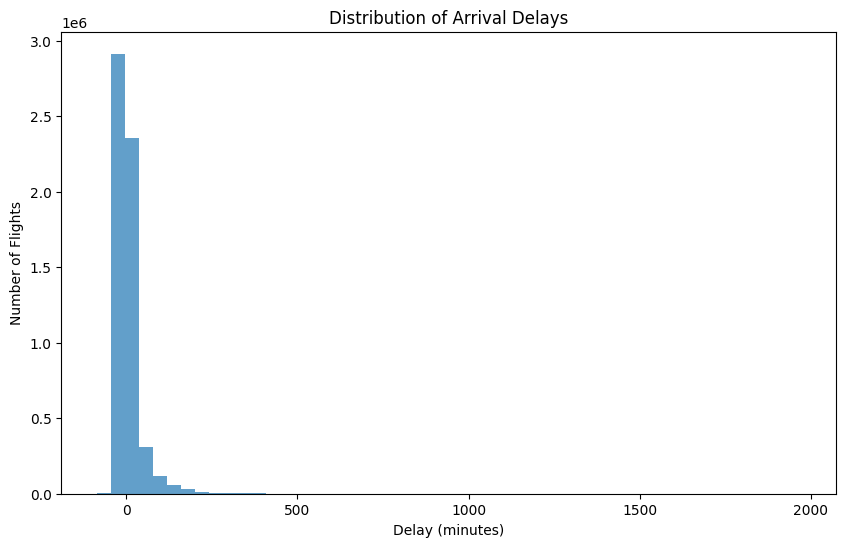

In [5]:
# Analyise how delays are distributed
import matplotlib.pyplot as plt

# Departure delays
flights['DEPARTURE_DELAY'].plot(kind='hist', bins=50, figsize=(10, 6), alpha=0.7)
plt.title('Distribution of Departure Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Number of Flights')
plt.show()

# Arrival delays
flights['ARRIVAL_DELAY'].plot(kind='hist', bins=50, figsize=(10, 6), alpha=0.7)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Number of Flights')
plt.show()

#### Most flights have small delays but there are some outliers with long delays. Further analysis can be conducted to see if delays are linked to a specific time of the year such as winter.

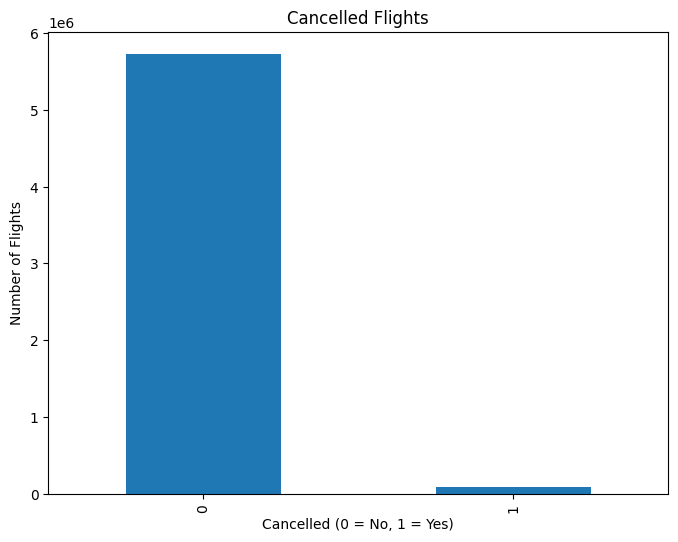

In [6]:
#CAnceled flights
cancelled_counts = flights['CANCELLED'].value_counts()

# Visualisera
cancelled_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Cancelled Flights')
plt.xlabel('Cancelled (0 = No, 1 = Yes)')
plt.ylabel('Number of Flights')
plt.show()


#### The bar chart shows that only a small percentage of flights were canceled (around 1.5%), while more than 98% of flights were completed as planned. This indicates that the system is robust but further analysis may be needed to understand the reasons behind the canceled flights.

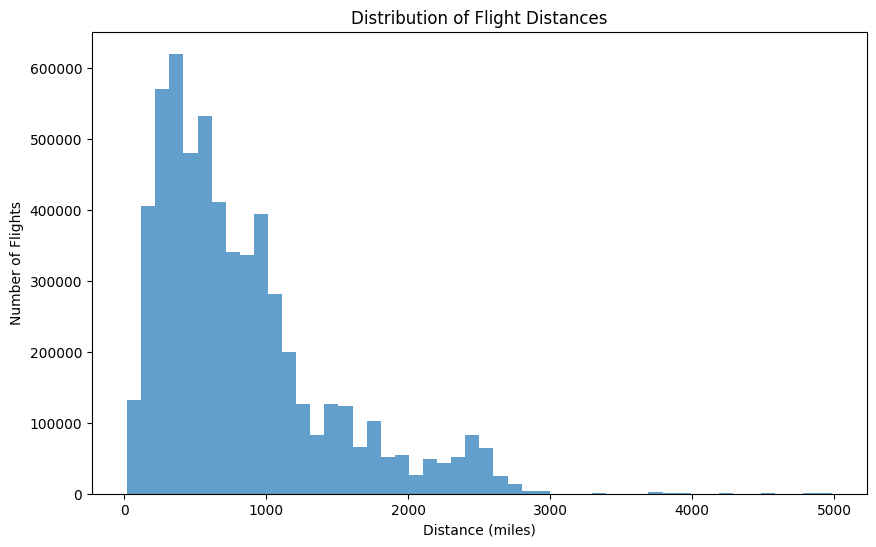

In [7]:
#Flight distance
flights['DISTANCE'].plot(kind='hist', bins=50, figsize=(10, 6), alpha=0.7)
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Number of Flights')
plt.show()


#### The histogram shows that the majority of flights are short- to medium-distance, ranging between 0 and 1000 miles. Long-distance flights (over 2000 miles) occur but are significantly fewer. This pattern reflects the high frequency of domestic flights in the United States.

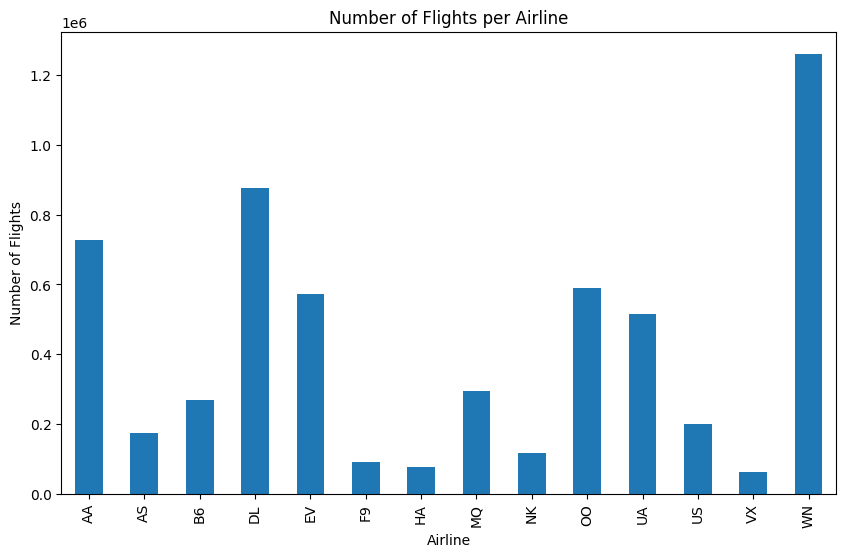

In [8]:
# Group and count the number of flights per airline
flights_per_airline = flights.groupby('AIRLINE').size()

flights_per_airline.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.show()


#### Southwest Airlines (WN) is the most active airline with over 1.2 million flights.  
#### Delta Air Lines (DL) and ExpressJet Airlines (EV) follow in second place.  
#### Smaller airlines like Frontier (F9) and Virgin America (VX) operate significantly fewer flights.

##### Before moving on to the percentage of canceled flights per airline, I can look at delays per month and analyze the average delay for each month.

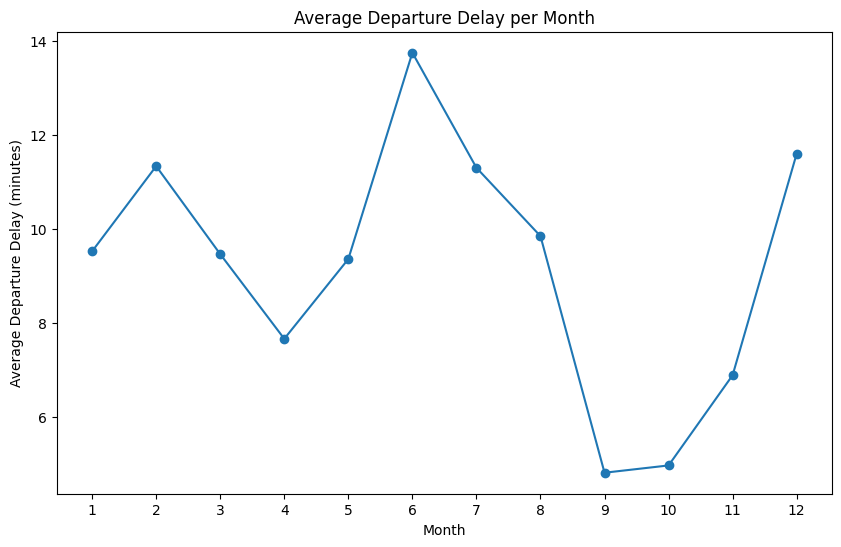

In [9]:
# Group and departure delays per month
avg_departure_delay_per_month = flights.groupby('MONTH')['DEPARTURE_DELAY'].mean()

# visualize
avg_departure_delay_per_month.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Departure Delay per Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(range(1, 13))  # För att visa månader 1-12
plt.show()


#### The line chart shows that average departure delays vary by month, with the highest delays in June and December. Delays decrease significantly during the autumn months, particularly in September. This pattern may be due to higher traffic volumes during holiday periods and the impact of seasonal weather conditions.

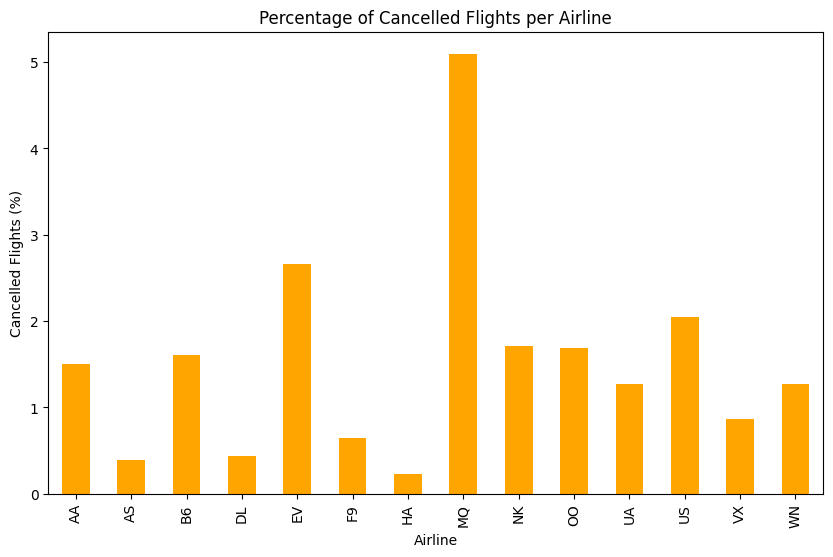

In [10]:
# Total number of canceled per airline
cancelled_percentage = flights.groupby('AIRLINE')['CANCELLED'].mean() * 100

# Visualisera
cancelled_percentage.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Percentage of Cancelled Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Cancelled Flights (%)')
plt.show()


#### MQ has the highest percentage of canceled flights, over 5%, which is significantly higher than other airlines.  
#### HA and Delta Air Lines (DL) have the lowest percentages of canceled flights, under 1%.  
#### The variations between airlines may be due to differences in operational factors, weather, or routes.

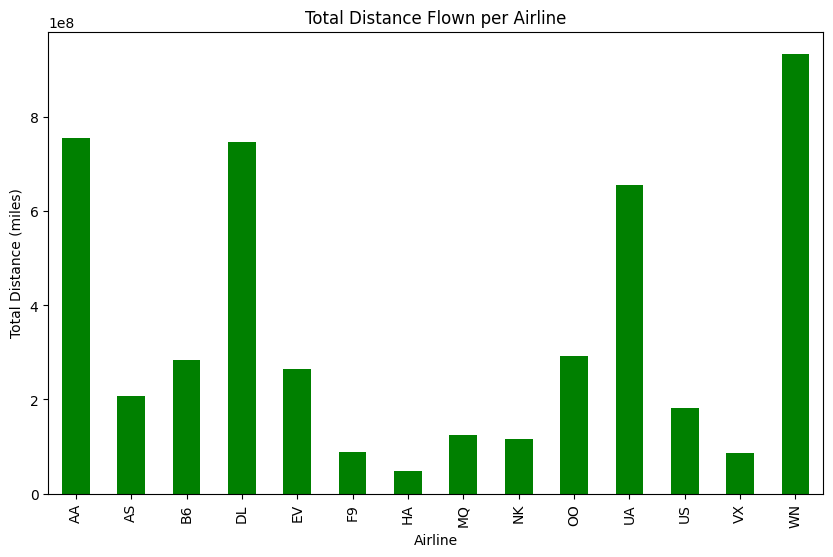

In [11]:
#Total distance per airline
total_distance_per_airline = flights.groupby('AIRLINE')['DISTANCE'].sum()

# visualise
total_distance_per_airline.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Total Distance Flown per Airline')
plt.xlabel('Airline')
plt.ylabel('Total Distance (miles)')
plt.show()


#### WN has flown the longest total distance, followed by American Airlines (AA) and Delta Air Lines (DL).  
#### Smaller airlines like F9 and VX have significantly shorter total flight distances.  
#### These differences reflect the size of the airlines and their geographic coverage.

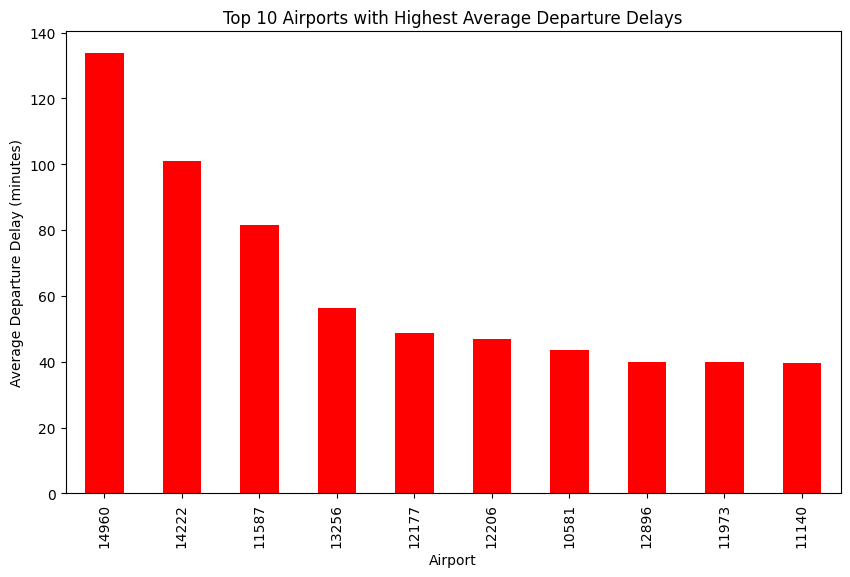

In [12]:
# Delays per airport
avg_delay_per_airport = flights.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().nlargest(10)


avg_delay_per_airport.plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Top 10 Airports with Highest Average Departure Delays')
plt.xlabel('Airport')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()


#### The airport with code 14960 has the highest average departure delays, with over 130 minutes on average. Airports with codes 14222 and 11587 follow as the next most problematic, with average delays of over 90 and 70 minutes, respectively. These airports may require improvements in management and infrastructure to reduce delays.

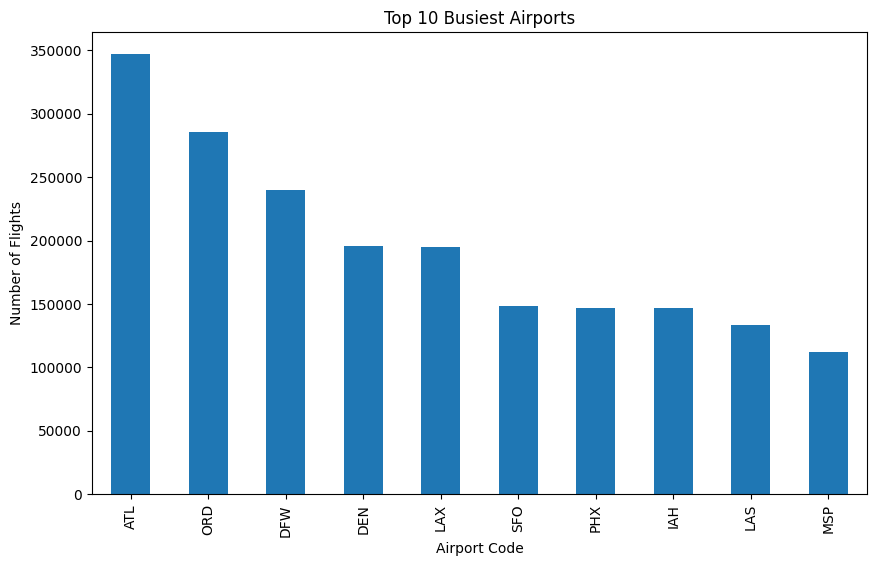

In [22]:
# Create flights_per_airport by grouping and counting flights per airport.
flights_per_airport = flights.groupby('ORIGIN_AIRPORT').size()

# choose top 10
top_airports = flights_per_airport.nlargest(10)

# show result
top_airports.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Busiest Airports')
plt.xlabel('Airport Code')
plt.ylabel('Number of Flights')
plt.show()


#### ATL is the busiest airport with over 350,000 flights.  
#### ORD and DFW follow as the second and third busiest airports.  
#### The other airports in the top 10, including Los Angeles (LAX) and San Francisco (SFO), also handle high volumes of air traffic.  

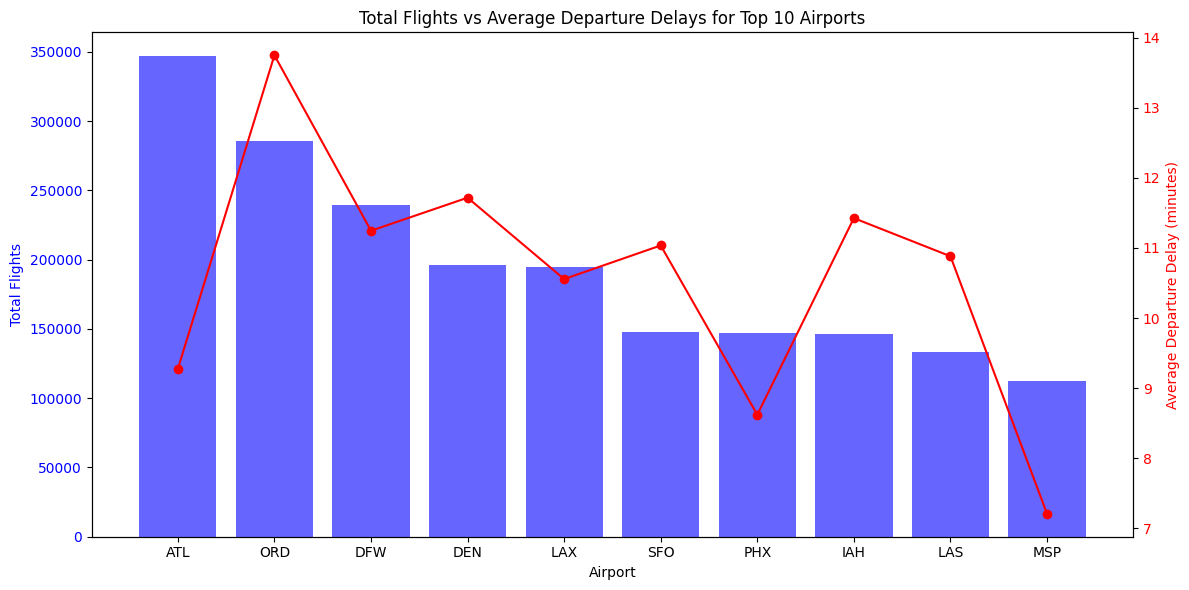

In [29]:
# Group and aggregate data to calculate total flights and average delays per airport
result = flights.groupby('ORIGIN_AIRPORT').agg(
    total_flights=('ORIGIN_AIRPORT', 'size'),
    avg_departure_delay=('DEPARTURE_DELAY', 'mean')
).reset_index()

# Visualize the result
def visualize_delays_vs_traffic(result):
    """
    Visualize the relationship between the number of flights and average departure delays
    for the largest airports.

    Parameters:
        result (DataFrame): DataFrame with airport, number of flights, and delays.
    """
    # Choose top 10 airports
    top_airports = result.sort_values(by='total_flights', ascending=False).head(10)

    # Create a figure with two axes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Barplot for total flights
    ax1.bar(top_airports['ORIGIN_AIRPORT'], top_airports['total_flights'], color='blue', alpha=0.6, label='Total Flights')
    ax1.set_xlabel('Airport')
    ax1.set_ylabel('Total Flights', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Add a second axis for average delays
    ax2 = ax1.twinx()
    ax2.plot(top_airports['ORIGIN_AIRPORT'], top_airports['avg_departure_delay'], color='red', marker='o', label='Avg Delay (minutes)')
    ax2.set_ylabel('Average Departure Delay (minutes)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Title and layout
    plt.title('Total Flights vs Average Departure Delays for Top 10 Airports')
    fig.tight_layout()
    plt.show()

# Call the visualization function
visualize_delays_vs_traffic(result)



#### ATL: Has the highest number of flights but a relatively low average delay (around 9 minutes).  
#### ORD: Has higher average delays (around 14 minutes), despite being the second busiest in terms of flights.  
#### MSP: Has the fewest flights in the top 10 but also the lowest average delay (around 7 minutes).  

#### Analyze with DuckDB, running SQL queries directly on the data using DuckDB.  

###### Example: Retrieve the 5 busiest airports:  

In [20]:
import duckdb

query = """
    SELECT ORIGIN_AIRPORT, COUNT(*) AS flight_count
    FROM flights
    GROUP BY ORIGIN_AIRPORT
    ORDER BY flight_count DESC
    LIMIT 5
"""
result = duckdb.query(query).df()
print("\nTop 5 Busiest Airports:")
print(result)


Top 5 Busiest Airports:
  ORIGIN_AIRPORT  flight_count
0            ATL        346836
1            ORD        285884
2            DFW        239551
3            DEN        196055
4            LAX        194673


#### ATL is the busiest airport with over 346,000 flights, as previously shown in the chart, followed by ORD and DFW. DEN and LAX are also among the five busiest airports.